In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
# polar_to_cartesian
def polar_to_cartesian(r, theta):
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x, y

In [3]:
# Get length of hypotenuse from angle
def resize(scale, theta):
    non_scaled_len = np.sqrt(1**2 + np.tan(theta)**2)
    return scale * non_scaled_len, theta

In [4]:
num_beams = 1081  # Number of LiDAR beams

# Angle calculations (from southeast, counterclockwise over 3/2 pi)
angles = np.linspace(-0.25*np.pi, 1.25 * np.pi, num=num_beams) # From -45 to 315 degrees with 0.25 degree increments
print(angles)


[-0.78539816 -0.78103484 -0.77667152 ...  3.91826417  3.92262749
  3.92699082]


In [5]:
# Some points
polar_coords = [
    (1, 0),
    (1, 0.25),
    (1, 0.5),
    (1, 0.75),
    (1, 1)
]


In [6]:
scaled_polar_coords = [resize(0.5, theta) for r, theta in polar_coords]


In [7]:
cartesian_coords = [polar_to_cartesian(r, theta) for r, theta in scaled_polar_coords]

In [8]:
print(cartesian_coords)

[(0.5, 0.0), (0.5, 0.12767096061051814), (0.5, 0.27315124492189524), (0.5, 0.46579822997203624), (0.5000000000000001, 0.7787038623274511)]


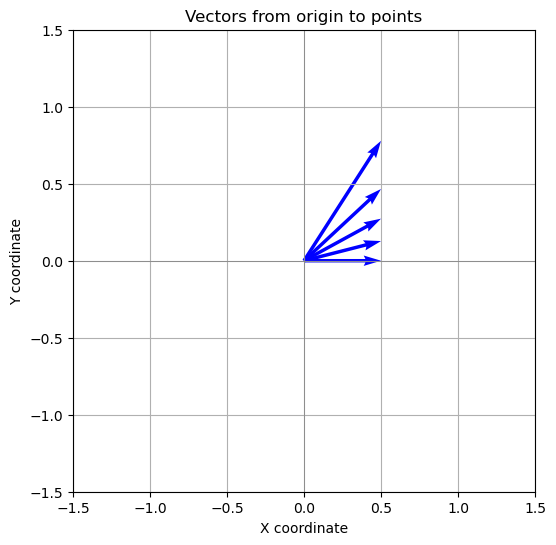

In [9]:
plt.figure(figsize=(6, 6))
for x, y in cartesian_coords:
    plt.quiver(0, 0, x, y, angles='xy', scale_units='xy', scale=1, color='b')

# Set plot limits and labels
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.grid(True)
plt.title('Vectors from origin to points')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

### Lets begin

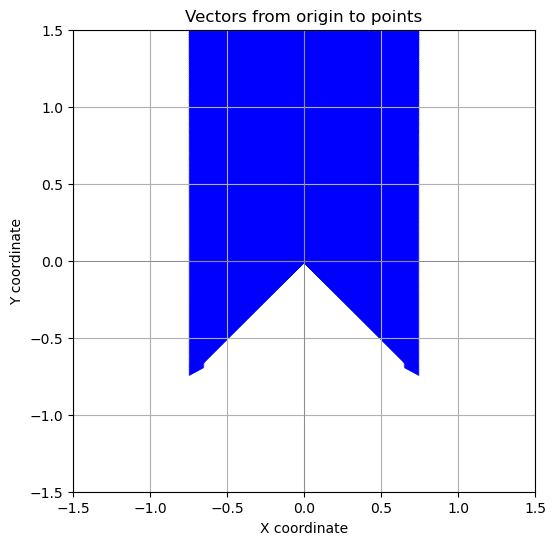

In [10]:
LiDAR_scale = [resize(0.75, theta) for theta in angles]
LiDAR_cart = [polar_to_cartesian(r, theta) for r, theta in LiDAR_scale]

plt.figure(figsize=(6, 6))
for x, y in LiDAR_cart:
    plt.quiver(0, 0, x, y, angles='xy', scale_units='xy', scale=1, color='b')

# Set plot limits and labels
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.grid(True)
plt.title('Vectors from origin to points')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

## Lets make the final method

In [11]:
# polar_to_cartesian
def polar_to_cartesian(r, theta):
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x, y

In [12]:
# Get length of hypotenuse from angle
def resize(scale, theta):
    non_scaled_len = np.sqrt(1**2 + np.tan(theta)**2)
    return scale * non_scaled_len, theta

In [13]:

def get_scale_vector(width=0.145, length=0.18, num_beams=1081, fov=1.5*np.pi):
    # Rotate beams
    shift = -(2*np.pi-fov)/2
    angles = np.linspace(shift, fov+shift, num=num_beams)

    # Angle to the corner of the car
    angle_radians = np.arctan2(length, width)


    # Calculate scale vector
    LiDAR_scale = [resize(width, theta) for theta in angles]

    # if the angle is greater than the angle to the corner of the car and pi-angle for the other side 
    # then the scale is to the front of the car
    for i, (r, theta) in enumerate(LiDAR_scale):
        if abs(theta) > angle_radians and abs(theta) < np.pi-angle_radians:
            # sqrt(1^2 + cot^2)
            # LiDAR_scale[i] = (length/np.tan(theta), theta)
            front_scale = np.sqrt(1**2 + (1/np.tan(theta))**2) * length
            LiDAR_scale[i] = (front_scale, theta)

    scaled_vec = [scale for scale, _ in LiDAR_scale]

    # return scaled_vec
    return LiDAR_scale


In [14]:

def get_scale_vector2(width=0.145, length=0.18, num_beams=1081, fov=1.5*np.pi):
    # Rotate beams
    shift = -(2*np.pi - fov) / 2
    angles = np.linspace(shift, fov + shift, num=num_beams)

    # Angle to the corner of the car
    angle_radians = np.arctan2(length, width)

    scaled_vec = []

    for theta in angles:
        if abs(theta) > angle_radians and abs(theta) < np.pi - angle_radians:
            # Beam points to the front of the car
            scale = length * np.sqrt(1 + (np.cos(theta) / np.sin(theta))**2)
        else:
            # Beam points to the side or rear of the car
            scale = width * np.sqrt(1 + (np.sin(theta) / np.cos(theta))**2)

        scaled_vec.append(scale)

    return scaled_vec


In [15]:
samples = 24
scaled_vec1 = get_scale_vector(num_beams=samples)

shift = -(2*np.pi - 1.5*np.pi) / 2
angles = np.linspace(shift, 1.5*np.pi + shift, num=samples)


In [16]:
car_cart = [polar_to_cartesian(r, theta) for r, theta in scaled_vec1]
orig_cart = [polar_to_cartesian(0.23, theta) for theta in angles]

Text(0, 0.5, 'Y coordinate')

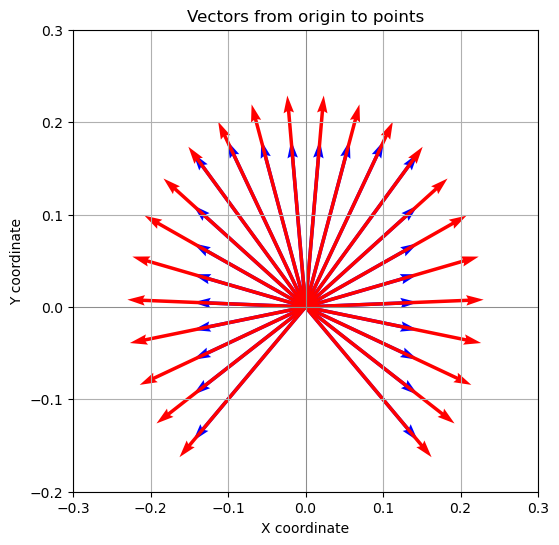

In [17]:
# Plot both vectors
plt.figure(figsize=(6, 6))
for x, y in car_cart:
    plt.quiver(0, 0, x, y, angles='xy', scale_units='xy', scale=1, color='b', label='Car')
for x, y in orig_cart:
    plt.quiver(0, 0, x, y, angles='xy', scale_units='xy', scale=1, color='r', label='Original')\
    
# Set plot limits and labels
plt.xlim(-0.3, 0.3)
plt.ylim(-0.2, 0.3)
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.grid(True)
plt.title('Vectors from origin to points')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')

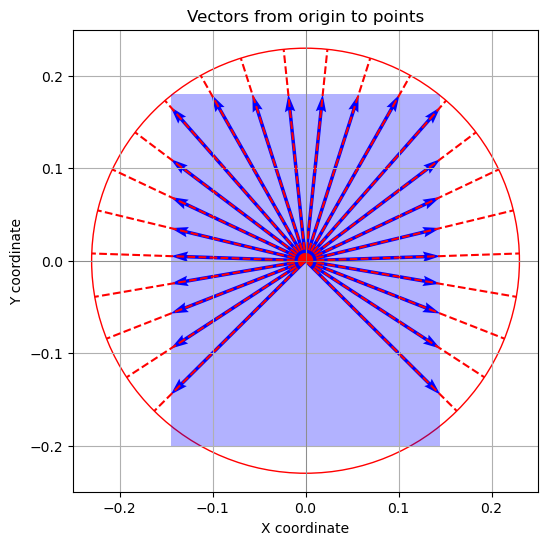

In [20]:
# Plot both vectors
plt.figure(figsize=(6, 6))
# for x, y in orig_cart:
#     plt.quiver(0, 0, x, y, angles='xy', scale_units='xy', scale=1, color='r', label='Original')

for x, y in car_cart:
    plt.quiver(0, 0, x, y, angles='xy', scale_units='xy', scale=1, color='b', label='Car')
for x, y in orig_cart:
    plt.plot([0, x], [0, y], 'r--', label='Original')

# Show the original circle outline
circle = plt.Circle((0, 0), 0.23, color='r', fill=False)
plt.gca().add_artist(circle)

# Add a tinted rectangle
ax = plt.gca()
rect = patches.Rectangle((-0.145, -0.2), 0.145 - (-0.145), 0.18 - (-0.2), linewidth=1, edgecolor='none', facecolor='blue', alpha=0.3)
ax.add_patch(rect)

    
# Set plot limits and labels
plt.xlim(-0.25, 0.25)
plt.ylim(-0.25, 0.25)
plt.axhline(0, color='grey', lw=0.5)
plt.axvline(0, color='grey', lw=0.5)
plt.grid(True)
plt.title('Vectors from origin to points')
plt.xlabel('X coordinate')
plt.ylabel('Y coordinate')

plt.savefig('plots/LiDAR_Square.svg', format='svg')
plt.show()